__________________________________

# DECISION TREE

__________________

In [1]:
import numpy as np
import pandas as pd

# import data dari csv
datatree =  pd.read_csv('data tree.csv')

# manmpilkan beberapa baris data awal
datatree.head()

,No,Jenis Kelamin,Single,Tinggal di Kota,usia,Perokok,Budget,Kesukaan,Tertarik Beli?
0,1,1,0,1,32,0,low,Tekno,0
1,2,0,1,0,38,0,medium,Tekno,0
2,3,0,0,0,33,0,low,Tekno,0
3,4,0,1,0,27,0,medium,Lainnya,0
4,5,1,1,1,30,0,medium,Busana,1


In [4]:
print("Dimensi Data : ",datatree.shape,"\n")
print("Tipe Data :\n ",datatree.dtypes,"\n")
print("Data Hilang :\n ",datatree.isnull().sum())

Dimensi Data :  (1084, 9) 

Tipe Data :
  No                  int64
Jenis Kelamin       int64
Single              int64
Tinggal di Kota     int64
usia                int64
Perokok             int64
Budget             object
Kesukaan           object
Tertarik Beli?      int64
dtype: object 

Data Hilang :
  No                 0
Jenis Kelamin      0
Single             0
Tinggal di Kota    0
usia               0
Perokok            0
Budget             0
Kesukaan           0
Tertarik Beli?     0
dtype: int64


_______________________________

# EKSPLORASI DATA

________________________________________-

In [ ]:
# Peubah Respon

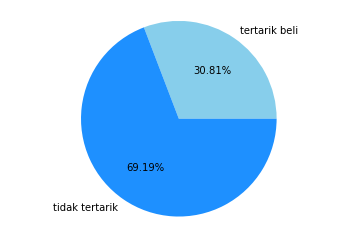

In [6]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

# menghitung ukuran diagram pie
size = [sum(datatree['Tertarik Beli?']),len(datatree['Tertarik Beli?'])-sum(datatree['Tertarik Beli?'])]

# menentukan label
labels = ['tertarik beli','tidak tertarik']

# memilih warna
color = ["skyblue","dodgerblue"]

# diagram pie 
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')

plt.axis('equal')
plt.show()

# Peubah Penjelas Kategorik

In [7]:
## definisikan nilai-nilai pada peubah
datatree['Jenis Kelamin'] = datatree['Jenis Kelamin'].map({1:'Laki-Laki',0:'Perempuan'})
datatree['Single'] = datatree['Single'].map({1:'Single',0:'Tidak Single'})
datatree['Tinggal di Kota'] = datatree['Tinggal di Kota'].map({1:'Tinggal di kota',0:'Tinggal di pedesaan'})
datatree['Perokok'] = datatree['Perokok'].map({1:'Perokok',0:'Bukan Perokok'})

In [8]:
# daftar peubah kategorik
PEUBAH_KATEGORIK=list(datatree.columns[datatree.dtypes==object])

In [9]:
# memunculkan frekuensi 
for i in PEUBAH_KATEGORIK:
    print(datatree[i].value_counts(),"\n")

Perempuan    588
Laki-Laki    496
Name: Jenis Kelamin, dtype: int64 

Single          851
Tidak Single    233
Name: Single, dtype: int64 

Tinggal di pedesaan    746
Tinggal di kota        338
Name: Tinggal di Kota, dtype: int64 

Bukan Perokok    929
Perokok          155
Name: Perokok, dtype: int64 

low       443
medium    436
high      205
Name: Budget, dtype: int64 

Tekno      520
Busana     234
Seni       209
Lainnya    121
Name: Kesukaan, dtype: int64 



In [10]:
# membuat tabulasi silang
datatree['Tertarik Beli2?']=datatree['Tertarik Beli?'].map({1:'Tertarik',0:'Tidak Tertarik'})

jk=pd.crosstab(datatree['Jenis Kelamin'],datatree['Tertarik Beli2?'],normalize=0)
single=pd.crosstab(datatree['Single'],datatree['Tertarik Beli2?'],normalize=0)
kota=pd.crosstab(datatree['Tinggal di Kota'],datatree['Tertarik Beli2?'],normalize=0)
perokok=pd.crosstab(datatree['Perokok'],datatree['Tertarik Beli2?'],normalize=0)
budget=pd.crosstab(datatree['Budget'],datatree['Tertarik Beli2?'],normalize=0)
kesukaan=pd.crosstab(datatree['Kesukaan'],datatree['Tertarik Beli2?'],normalize=0)

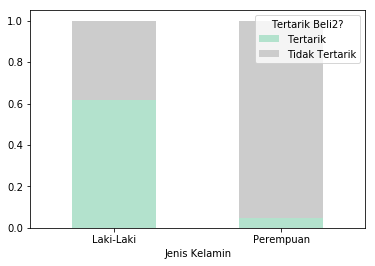

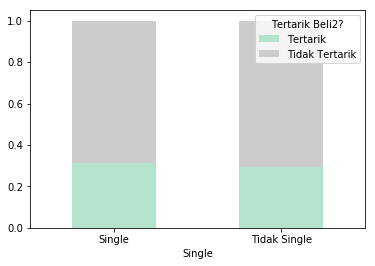

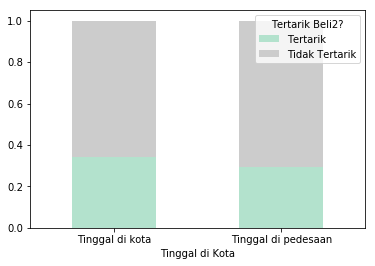

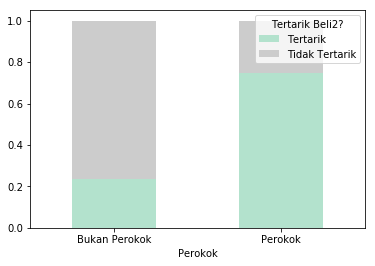

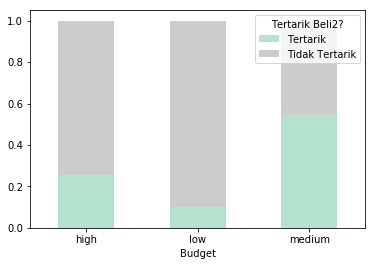

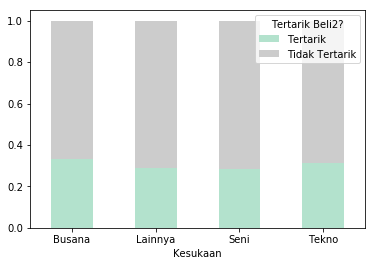

In [11]:
# ukuran gambar (panjang, lebar)
plt.figure(figsize=(16,6))

jk.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

single.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

kota.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

perokok.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

budget.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

kesukaan.plot(kind='bar',stacked=True,cmap="Pastel2")
plt.xticks(rotation='horizontal')

plt.show()

# Peubah Penjelas Numerik

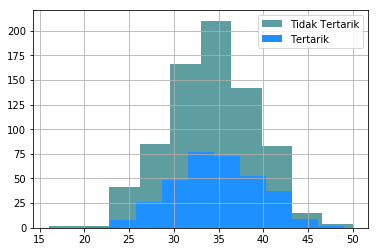

In [12]:
# membuat histogram dalam satau jendela

# menagkases peubah tertentu berdasarkan kondidisi/nilai pada peubah lain
datatree['usia'][datatree['Tertarik Beli?']==0].hist(color="cadetblue")
datatree['usia'][datatree['Tertarik Beli?']==1].hist(color="dodgerblue")

# membuat keterangan
plt.legend(["Tidak Tertarik","Tertarik"],loc='best')
plt.show()

# Eksplorasi Data dengan Seaborn

In [13]:
# library seaborn
import seaborn as sns

countplot

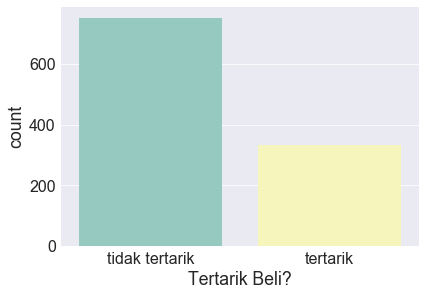

In [14]:
# mengatur gaya tampilan dari grafik
sns.set(style="darkgrid")

# mengatur besarnya huruf
sns.set_context("paper", font_scale=2)

# membuat grafik
ax = sns.countplot(x="Tertarik Beli?",data=datatree,palette="Set3")

# mengatur ketrangan pada gambar
ax.set_xticklabels(['tidak tertarik','tertarik'])

plt.show()

Multiple Countplot

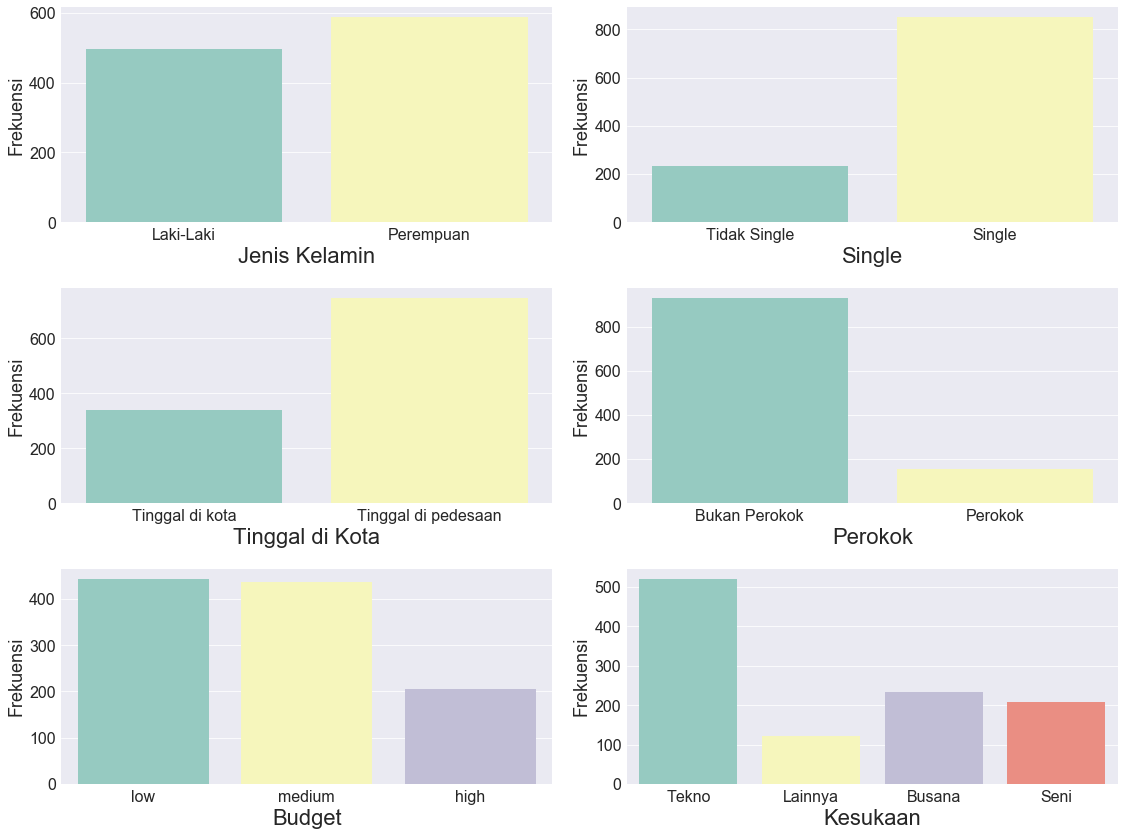

In [15]:
# membuat barchart dengan looping

# menyediakan sejumlah jendela
fig, axes = plt.subplots(3,2,sharey=False)

# mengatur ukuran jendela
fig.set_size_inches(16,12)

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(PEUBAH_KATEGORIK)):
    sns.countplot(x=PEUBAH_KATEGORIK[i],data=datatree,palette="Set3",ax=ax[i])
    ax[i].set_xlabel(PEUBAH_KATEGORIK[i],fontsize=22)
    ax[i].set_ylabel("Frekuensi",fontsize=18)

# mengatur jarak pada jendela secara otomatis
plt.tight_layout()

# memunculkan hasl
fig

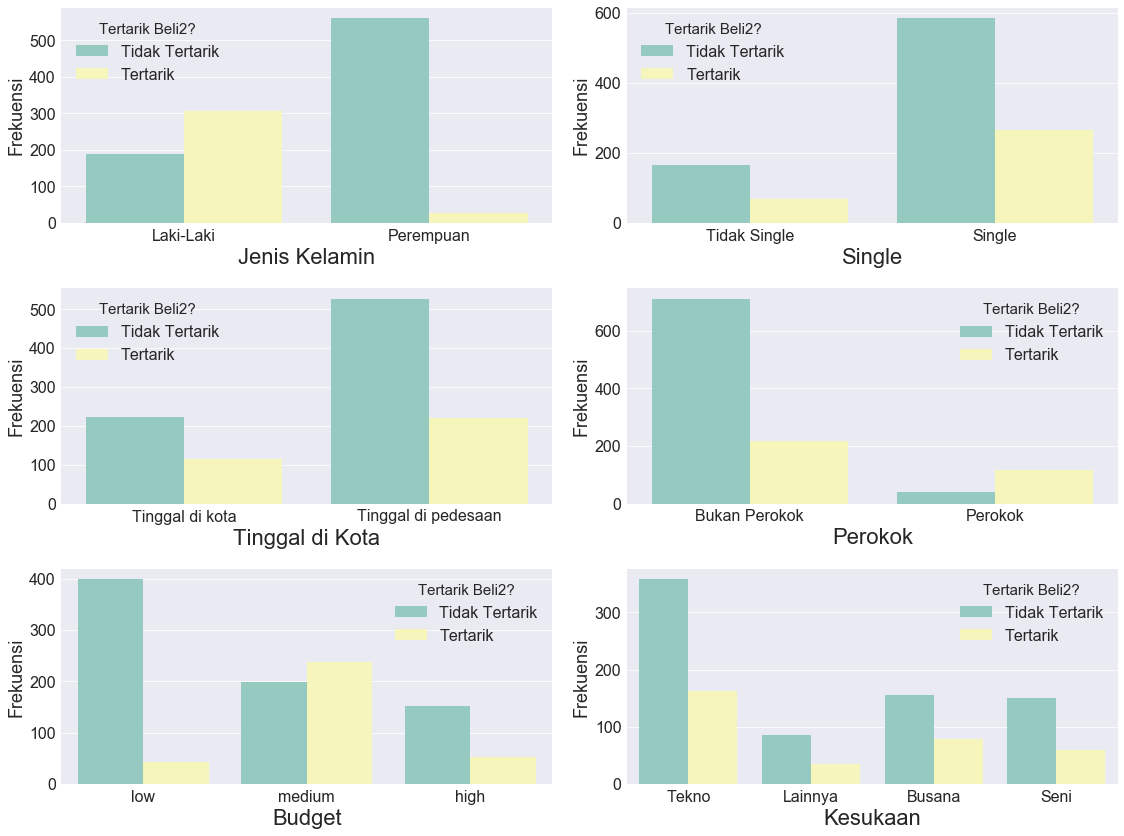

In [16]:
# membuat stacked barchart dengan looping
fig, axes = plt.subplots(3,2,sharey=False)

# mengatur ukuran jendela
fig.set_size_inches(16,12)

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(PEUBAH_KATEGORIK)):
    sns.countplot(x=PEUBAH_KATEGORIK[i],hue="Tertarik Beli2?",data=datatree,palette="Set3",ax=ax[i])
    ax[i].set_xlabel(PEUBAH_KATEGORIK[i],fontsize=22)
    ax[i].set_ylabel("Frekuensi",fontsize=18)
 
# mengatur jarak pada jendela secara otomatis
plt.tight_layout()

# memunculkan hasil
fig

_______________________

# PEMODELAN

# Membuat Variabel Dummy

In [17]:
print("peubah awal:\n", list(datatree),"\n")
# pembuatan peubah boneka secara otomatis untuk semua peubah kategorik
datatree_dummies = pd.get_dummies(datatree)
print("peubah setelah dummy dibuat:\n", list(datatree_dummies),"\n")

peubah awal:
 ['No', 'Jenis Kelamin', 'Single', 'Tinggal di Kota', 'usia', 'Perokok', 'Budget', 'Kesukaan', 'Tertarik Beli?', 'Tertarik Beli2?'] 

peubah setelah dummy dibuat:
 ['No', 'usia', 'Tertarik Beli?', 'Jenis Kelamin_Laki-Laki', 'Jenis Kelamin_Perempuan', 'Single_Single', 'Single_Tidak Single', 'Tinggal di Kota_Tinggal di kota', 'Tinggal di Kota_Tinggal di pedesaan', 'Perokok_Bukan Perokok', 'Perokok_Perokok', 'Budget_high', 'Budget_low', 'Budget_medium', 'Kesukaan_Busana', 'Kesukaan_Lainnya', 'Kesukaan_Seni', 'Kesukaan_Tekno', 'Tertarik Beli2?_Tertarik', 'Tertarik Beli2?_Tidak Tertarik'] 



In [18]:
# memunculkan hasil pembuatan peubah boneka
datatree_dummies.head()

,No,usia,Tertarik Beli?,Jenis Kelamin_Laki-Laki,Jenis Kelamin_Perempuan,Single_Single,Single_Tidak Single,Tinggal di Kota_Tinggal di kota,Tinggal di Kota_Tinggal di pedesaan,Perokok_Bukan Perokok,Perokok_Perokok,Budget_high,Budget_low,Budget_medium,Kesukaan_Busana,Kesukaan_Lainnya,Kesukaan_Seni,Kesukaan_Tekno,Tertarik Beli2?_Tertarik,Tertarik Beli2?_Tidak Tertarik
0,1,32,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1
1,2,38,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1
2,3,33,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1
3,4,27,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
4,5,30,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0


In [19]:
# dimensi data setelah pembuatan peubah bondeka
datatree_dummies.shape

(1084, 20)

In [20]:
# peubah penjelas dan peubah respon

# memilih berdasarkan urutan kolom
FITUR=list(datatree_dummies.columns[1:2])+list(datatree_dummies.columns[3:18])

# memilih berdasarkan nama peubah
y = datatree_dummies['Tertarik Beli?']

In [21]:
# daftar peubah penjelas
FITUR

['usia',
 'Jenis Kelamin_Laki-Laki',
 'Jenis Kelamin_Perempuan',
 'Single_Single',
 'Single_Tidak Single',
 'Tinggal di Kota_Tinggal di kota',
 'Tinggal di Kota_Tinggal di pedesaan',
 'Perokok_Bukan Perokok',
 'Perokok_Perokok',
 'Budget_high',
 'Budget_low',
 'Budget_medium',
 'Kesukaan_Busana',
 'Kesukaan_Lainnya',
 'Kesukaan_Seni',
 'Kesukaan_Tekno']

# Membagi Data Train Test

In [22]:
# library untuk membagi data
from sklearn.model_selection import train_test_split

In [23]:
# data dibagi menjadi 3 bagian, data train, validasi, dan data tets
x_trainval, x_test, y_trainval, y_test = train_test_split(datatree_dummies[FITUR],y,train_size=0.7,random_state=11,stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval,y_trainval,train_size=0.7,random_state=11,stratify=y_trainval)

C:\Users\Muy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
# memunculkan dimensi masing-masing gugus data
print(x_train.shape)
print(x_test.shape)

(530, 16)
(326, 16)


# Baseline Model Tree

In [25]:
# library descion tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
# membangun model pohon
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# beberapa library yang diperlukan untuk menampilkan pohon keputusan
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

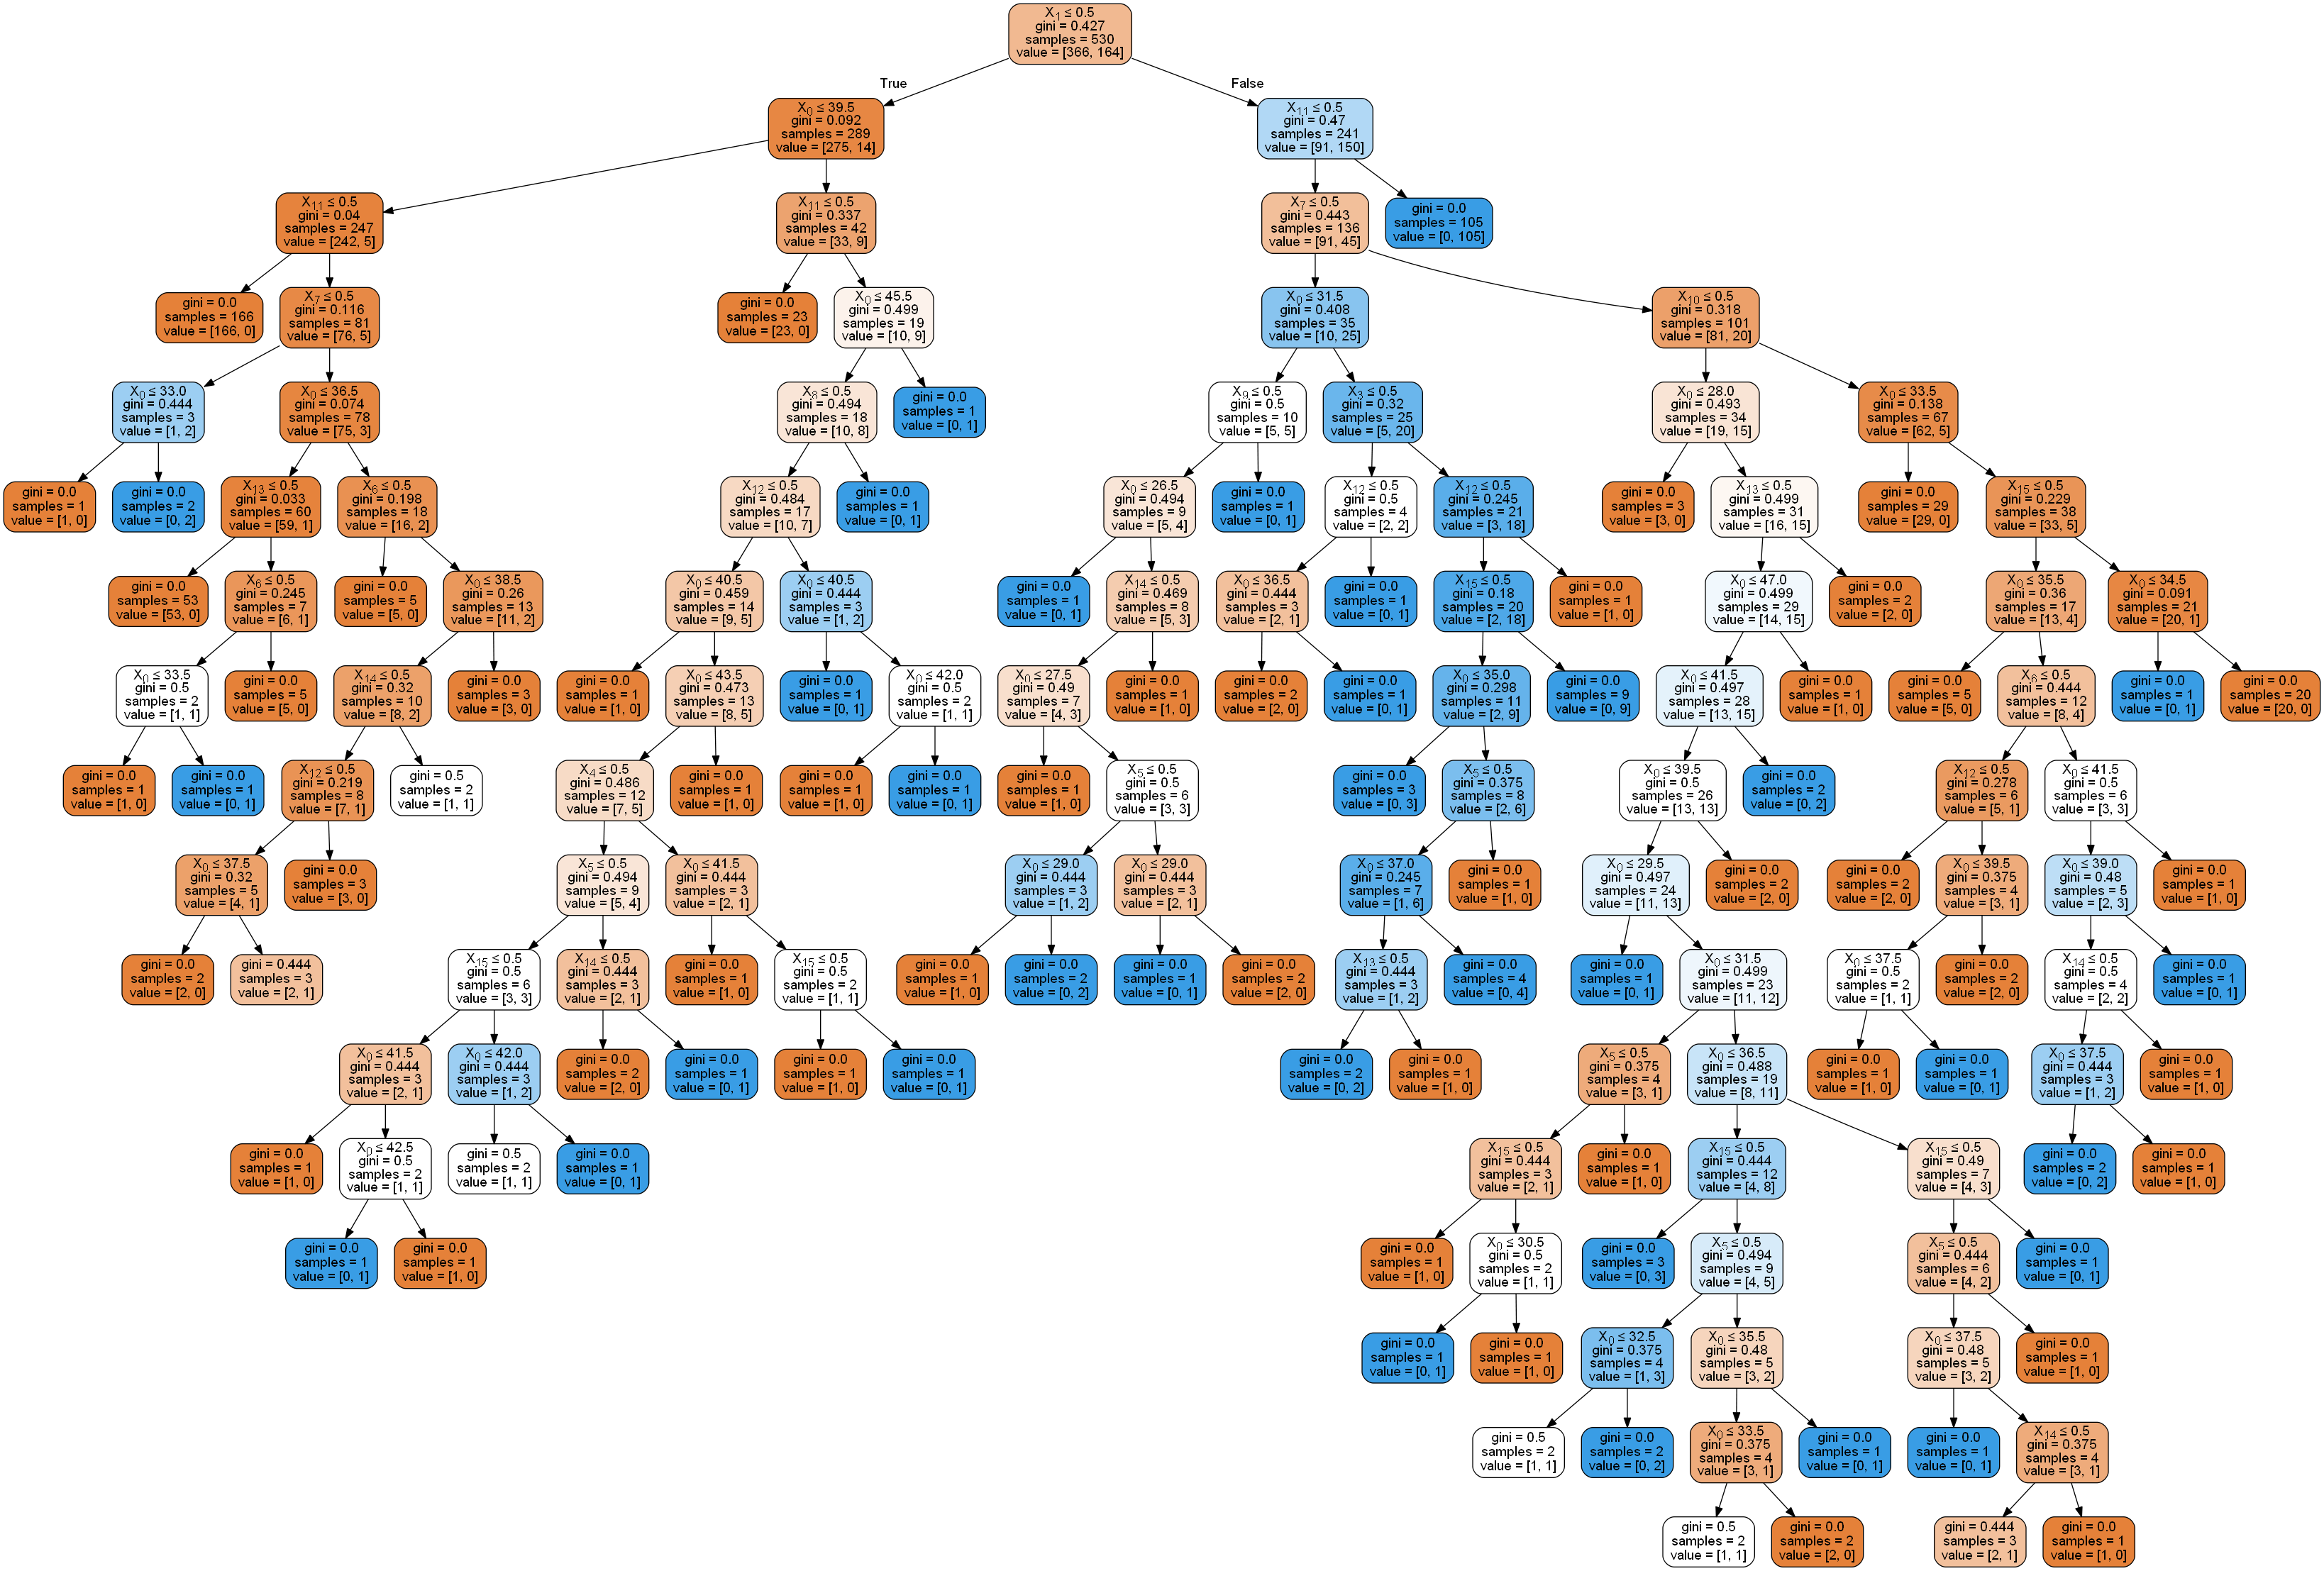

In [28]:
# program untuk memunculkan pohon
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Evaluasi Prediksi

In [29]:
# library untuk evaluasi hasil prediksi
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import classification_report

# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [30]:
# menampilakn beberapa ukuran prediksi pada data latih/train
print("akurasi \n",accuracy_score(y_train,tree.predict(x_train)),"\n")
print("recall \n",recall_score(y_train,tree.predict(x_train)),"\n")
print("precision \n",precision_score(y_train,tree.predict(x_train)),"\n")
print("confusion matrix \n",confusion_matrix(y_train,tree.predict(x_train)),"\n")
print("classification report \n",classification_report(y_train,tree.predict(x_train)),"\n")

akurasi 
 0.988679245283 

recall 
 0.963414634146 

precision 
 1.0 

confusion matrix 
 [[366   0]
 [  6 158]] 

classification report 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       366
          1       1.00      0.96      0.98       164

avg / total       0.99      0.99      0.99       530
 



In [31]:
# menampilan beberapa ukuran prediksi pada data test/uji
print("akurasi \n",accuracy_score(y_test,tree.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,tree.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,tree.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,tree.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,tree.predict(x_test)),"\n")

akurasi 
 0.889570552147 

recall 
 0.85 

precision 
 0.801886792453 

confusion matrix 
 [[205  21]
 [ 15  85]] 

classification report 
              precision    recall  f1-score   support

          0       0.93      0.91      0.92       226
          1       0.80      0.85      0.83       100

avg / total       0.89      0.89      0.89       326
 



In [32]:
# menampilkan ukuran prediksi menggunakan validasi silang
skfold = StratifiedKFold(n_splits=10)
print("Akurasi \n",cross_val_score(tree,x_trainval,y_trainval,scoring="accuracy",cv=skfold).mean(),"\n")
print("Recall \n",cross_val_score(tree,x_trainval,y_trainval,scoring="recall",cv=skfold).mean(),"\n")
print("presisi \n",cross_val_score(tree,x_trainval,y_trainval,scoring="precision",cv=skfold).mean(),"\n")
print("f1-score \n",cross_val_score(tree,x_trainval,y_trainval,scoring="f1",cv=skfold).mean(),"\n")

Akurasi 
 0.887982683983 

Recall 
 0.804528985507 

presisi 
 0.818511972729 

f1-score 
 0.811548038199 



# Memilih parameter tertentu berdasarkan validasi dan validasi silang : max_depth

hanya kedalaman pohon

In [33]:
# memilih kedalaman pohon

# validasi silang berstrata
skfold = StratifiedKFold(n_splits=10)

# menyediakan tempat untuk beberapa skor prediksi
test_score = []
train_score = []
valid_score = []
cv_score = []

# memilih kedalaman pohon menggunakan looping dengan skor sensitivitas/recall
depth_range = range(3,40)
for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train,y_train)
    
    valid_score.append(recall_score(y_valid,tree.predict(x_valid)))
    test_score.append(recall_score(y_test,tree.predict(x_test)))
    train_score.append(recall_score(y_train,tree.predict(x_train)))
    cv_score.append(cross_val_score(tree,x_trainval,y_trainval,scoring="recall",cv=skfold).mean())

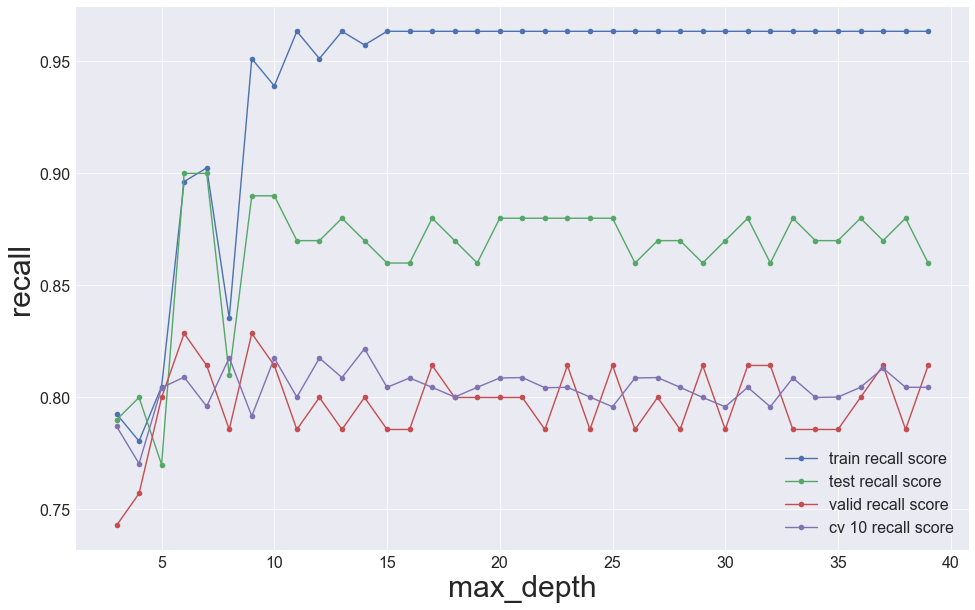

In [35]:
# menampikan sensitivitas pada hasil looping
plt.figure(figsize=(16,10))

# menumpuk beberapa garis dalam satu jendela
plt.plot(depth_range,train_score,'o-')
plt.plot(depth_range,test_score,'o-')
plt.plot(depth_range,valid_score,'o-')
plt.plot(depth_range,cv_score,'o-')

# memunculkan keterangan
plt.legend(['train recall score','test recall score','valid recall score','cv 10 recall score'])

# mangatur label pada sumbu x
plt.xlabel("max_depth",fontsize=30)

# mangatur label pada sumbu y
plt.ylabel("recall",fontsize=30)

# memunculkan hasil
plt.show()

# Memilih Parameter Tertentu Berdasarkan Validasi : max_depth dan min_samples_split 

In [36]:
# menyiapkan tempat untuk skor pada data test dan data train
test_score = []
train_score = []

# parameter yang disiapkan
depth_range = range(3,20)
split_range = [50,75,100,120,150]

# menyiapkan tempat untuk paramerer
depthlist = []
splitlist = []

# inisialiasi skor awal
best_score = 0


for split in split_range:
    for depth in depth_range:
        tree = DecisionTreeClassifier(max_depth=depth,min_samples_split=split)
        
        # membangun model
        tree.fit(x_train,y_train)
        
        # menumpulkan skor untuk setiap kombinasi parameter
        test_score.append(recall_score(y_valid,tree.predict(x_valid)))
        train_score.append(recall_score(y_train,tree.predict(x_train)))
        score = recall_score(y_valid,tree.predict(x_valid))
        if score>best_score:
            best_score = score
            best_param = {'max_depth':depth,'min_samples_split':split}
            
        depthlist.append(depth)
        splitlist.append(split)

# menyimpan hasil dalam bentuk dataframe
param_grid = {'max_depth':depthlist,'min_samples_split':splitlist}
param_grid = pd.DataFrame(param_grid,columns = ['max_depth','min_samples_split'])
param_grid['recall_test']=test_score
param_grid['recall_train']=train_score

In [37]:
# memunculkan beberapa baris awal dan baris akhir dataframe kombinasi parameter dan evaluasinya 
print(param_grid.head())
print(param_grid.tail())

   max_depth  min_samples_split  recall_test  recall_train
0          3                 50     0.742857      0.792683
1          4                 50     0.785714      0.804878
2          5                 50     0.785714      0.804878
3          6                 50     0.785714      0.804878
4          7                 50     0.785714      0.804878
    max_depth  min_samples_split  recall_test  recall_train
80         15                150          0.6      0.640244
81         16                150          0.6      0.640244
82         17                150          0.6      0.640244
83         18                150          0.6      0.640244
84         19                150          0.6      0.640244


In [38]:
# kombinasi parameter terbaik
print("Skor terbaik",best_score)
print("Parameter terbaik",best_param)

Skor terbaik 0.785714285714
Parameter terbaik {'max_depth': 4, 'min_samples_split': 50}


# Memilih Parameter Tertentu Berdasarkan Validasi Silang : max_depth dan min_samples_split 

In [39]:
# library untuk melakukan perintah validasi silang secara stratified
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [41]:
# menyiapkan tempat untuk skor validasi silang
cv_score = []
cv_score_mean = []

# perintah agar validasi silang berjalan secara stratified
skfold = StratifiedKFold(n_splits=5)

# parameter yang disiapkan
depth_range = range(3,20)
split_range = [50,75,100,120,150]

# inisialisasi skor awal
best_score_cv = 0

for split in split_range :
    for depth in depth_range :
        tree = DecisionTreeClassifier(max_depth = depth,min_samples_split = split)
        
        # menyatukan skor validasi silang
        cv_score.append(cross_val_score(tree,x_trainval,y_trainval,cv=skfold,scoring='recall'))
       
        # menyatukan rataan skor validasi silang
        cv_score_mean.append(cross_val_score(tree,x_trainval,y_trainval,cv=skfold,scoring='recall').mean())
        
        score = cross_val_score(tree,x_trainval,y_trainval,cv=skfold,scoring='recall').mean() 
        if score > best_score_cv :
            best_score_cv =score
            best_param = {'max_depth':depth,'min_samples_split':split}


# menggabungkan skor validasi silang dengan pasangan parameternya 
param_grid['recall_cv'] = cv_score_mean

In [42]:
# menampilkan beberapa baris awal dataframe hasil parameter tunning
param_grid.head()

,max_depth,min_samples_split,recall_test,recall_train,recall_cv
0,3,50,0.742857,0.792683,0.786309
1,4,50,0.785714,0.804878,0.799075
2,5,50,0.785714,0.804878,0.799075
3,6,50,0.785714,0.804878,0.799075
4,7,50,0.785714,0.804878,0.799075


In [43]:
# kombinasi parameter terbaik
print("Skor Terbaik",best_score_cv)
print("Parameter Terbaik",best_param)

Skor Terbaik 0.79907493062
Parameter Terbaik {'max_depth': 4, 'min_samples_split': 50}


# Memilih Parameter Tertentu Menggunakan Fungsi GridSearchCV (Tunning) :

In [44]:
# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV
from pprint import pprint

siapkan parameter

In [45]:
# daftar parameter yang disiapkan
max_depth = [int(x) for x in np.linspace(4,22,num=9)]
max_depth.append(None)
min_samples_split = [2,50,75,100,120,150]
min_samples_leaf = [2,50,75,100,120,150]

# parmeter yang disiapkan digabung dalam satu objek
param_grid = {'max_depth':max_depth
             ,'min_samples_split':min_samples_split
             ,'min_samples_leaf':min_samples_leaf}

In [46]:
pprint(param_grid)

{'max_depth': [4, 6, 8, 10, 13, 15, 17, 19, 22, None],
 'min_samples_leaf': [2, 50, 75, 100, 120, 150],
 'min_samples_split': [2, 50, 75, 100, 120, 150]}


In [47]:
# program untuk tunning menggunakan fungsi GridSearchCV

# inisialisasi model 
tree = DecisionTreeClassifier()

# perintah untuk melakukan validasi silang secara stratified
skf = StratifiedKFold(n_splits=5,random_state=10)

# fungsi GridSearchCV
grid_search_tree = GridSearchCV(tree,
                             param_grid=param_grid, #parameter grid
                             scoring=['accuracy','recall','precision', 'f1'], #beberapa ukuran yang ingin dimunculkan
                             refit = 'f1', #ukuran prediksi yang digunakan untuk tunning
                             cv=skf, # metode validasi silang
                             return_train_score=True) #mengembalikan skor pada gugus data latih cross validasi

In [48]:
# melakukan parameter tunning menggunakan data training
grid_search_tree.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8, 10, 13, 15, 17, 19, 22, None], 'min_samples_split': [2, 50, 75, 100, 120, 150], 'min_samples_leaf': [2, 50, 75, 100, 120, 150]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [49]:
# memunculkan seluruh hasil fitting model
pd.DataFrame(grid_search_tree.cv_results_)

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_train_accuracy,mean_train_f1,mean_train_precision,mean_train_recall,...,std_fit_time,std_score_time,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall
0,0.003795,0.002855,0.899736,0.828889,0.880424,0.790550,0.918539,0.861566,0.908238,0.821618,...,0.003548,0.004018,0.013820,0.026375,0.056526,0.070912,0.005111,0.008444,0.032972,0.033175
1,0.002632,0.000801,0.903694,0.836477,0.886611,0.799118,0.913592,0.852053,0.904898,0.807726,...,0.002339,0.001602,0.011144,0.017661,0.060558,0.062833,0.003898,0.009322,0.031912,0.040821
2,0.001120,0.002024,0.903694,0.836477,0.886611,0.799118,0.913592,0.852053,0.904898,0.807726,...,0.002239,0.002499,0.011144,0.017661,0.060558,0.062833,0.003898,0.009322,0.031912,0.040821
3,0.001319,0.004968,0.903694,0.836477,0.886611,0.799118,0.913592,0.852053,0.904898,0.807726,...,0.001683,0.004695,0.011144,0.017661,0.060558,0.062833,0.003898,0.009322,0.031912,0.040821
4,0.000000,0.002013,0.910290,0.842388,0.919676,0.777786,0.911942,0.846127,0.918767,0.784196,...,0.000000,0.002488,0.018790,0.033215,0.035389,0.039357,0.002788,0.004369,0.009467,0.005087
5,0.002640,0.002156,0.903694,0.825009,0.930515,0.747920,0.905341,0.828665,0.934948,0.747833,...,0.002801,0.004312,0.023625,0.051207,0.047857,0.084158,0.010688,0.028008,0.029586,0.056450
6,0.000608,0.002439,0.883905,0.768586,0.993923,0.628280,0.883908,0.769575,0.993290,0.628217,...,0.000803,0.002386,0.013854,0.034882,0.012133,0.048263,0.003461,0.008555,0.003357,0.012072
7,0.002923,0.000809,0.883905,0.768586,0.993923,0.628280,0.883908,0.769575,0.993290,0.628217,...,0.002478,0.001617,0.013854,0.034882,0.012133,0.048263,0.003461,0.008555,0.003357,0.012072
8,0.002026,0.003579,0.883905,0.768586,0.993923,0.628280,0.883908,0.769575,0.993290,0.628217,...,0.002503,0.002309,0.013854,0.034882,0.012133,0.048263,0.003461,0.008555,0.003357,0.012072
9,0.004272,0.001921,0.883905,0.768586,0.993923,0.628280,0.883908,0.769575,0.993290,0.628217,...,0.004206,0.002602,0.013854,0.034882,0.012133,0.048263,0.003461,0.008555,0.003357,0.012072


In [50]:
# menampilkan hasil terbaik
print("parameter terbaik : \n",grid_search_tree.best_params_,"\n")
print("skor terbaik : \n",grid_search_tree.best_score_,"\n")
print("model terbaik : \n",grid_search_tree.best_estimator_,"\n")

parameter terbaik : 
 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 120} 

skor terbaik : 
 0.842387593218 

model terbaik : 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 



____________________________

# MODEL AKHIR

___________________________

In [51]:
# model akhir berdasarkan fungsi GridSearchCV
tree_final = grid_search_rf.best_estimator_
tree_final.fit(x_trainval,y_trainval)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
# menampilkan beberapa skor pada validasi akhir
print("akurasi \n",accuracy_score(y_test,tree_final.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,tree_final.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,tree_final.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,tree_final.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,tree_final.predict(x_test)),"\n")

akurasi 
 0.938650306748 

recall 
 0.82 

precision 
 0.97619047619 

confusion matrix 
 [[224   2]
 [ 18  82]] 

classification report 
              precision    recall  f1-score   support

          0       0.93      0.99      0.96       226
          1       0.98      0.82      0.89       100

avg / total       0.94      0.94      0.94       326
 



In [53]:
# membandingkan beberapa skor sebelum dan seusudah tunning parameter
tree.fit(x_trainval,y_trainval)
print("classification report sebelum tunning (gugus data test) :\n","\n",classification_report(y_test,tree.predict(x_test)),"\n")
print("classification report setelah tunning (gugus data test):\n","\n",classification_report(y_test,tree_final.predict(x_test)),"\n")

classification report sebelum tunning (gugus data test) :
 
              precision    recall  f1-score   support

          0       0.95      0.92      0.93       226
          1       0.82      0.88      0.85       100

avg / total       0.91      0.90      0.91       326
 

classification report setelah tunning (gugus data test):
 
              precision    recall  f1-score   support

          0       0.93      0.99      0.96       226
          1       0.98      0.82      0.89       100

avg / total       0.94      0.94      0.94       326
 



# Tingkat Kepentingan Peubah

In [54]:
list(tree_final.feature_importances_)

[0.029256130742727839,
 0.51730998249127835,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10518554955842879,
 0.0,
 0.032485078852407694,
 0.0,
 0.31576325835515728,
 0.0,
 0.0,
 0.0,
 0.0]

In [55]:
# mengembangkan fungsi untuk membuat plot peubah penting
def plot_peubah_penting(model):
    n_features = len(list(tree_final.feature_importances_))
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),FITUR,fontsize=14)
    plt.xlabel("Tingkat Kepentingan Peubah",fontsize=23)
    plt.ylabel("Peubah",fontsize=23)
    plt.show()

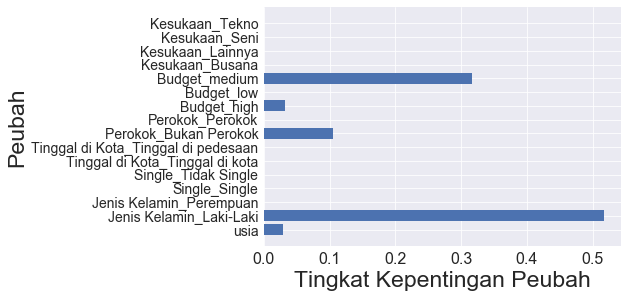

In [56]:
plot_peubah_penting(tree_final)

# Menampilkan Pohon

Menampilakan pohon cara 1

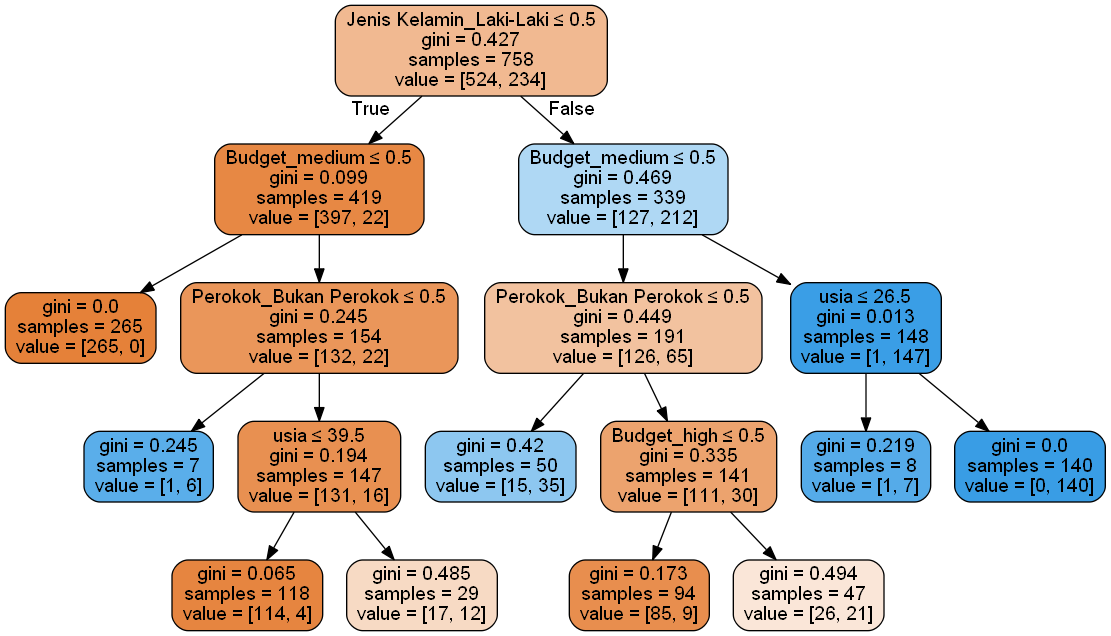

In [57]:
dot_data = StringIO()
export_graphviz(tree_final, out_file=dot_data, 
               filled=True, rounded=True,
               special_characters=True,
               feature_names=FITUR)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Menampilkan pohon cara 2

In [58]:
export_graphviz(tree_final, out_file="tree.dot"
                ,class_names=["tidak tertarik", "tertarik"]
                ,feature_names=FITUR
                ,impurity=False
                ,filled=True)

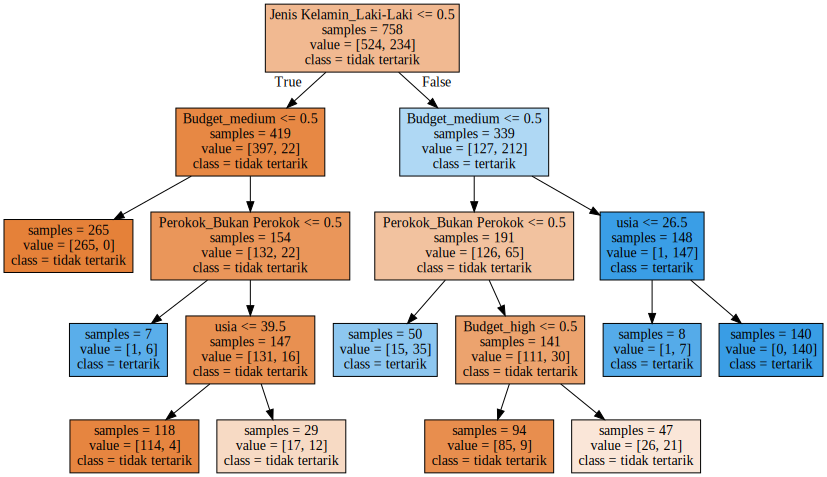

In [59]:
import graphviz
with open("tree.dot") as f:    
    dot_graph = f.read() 
graphviz.Source(dot_graph)

___________________________________--

# MENYIMPAN DAN MEMUAT MODEL 

__________________________________-

In [60]:
# library untuk menyimpan dan memuat model
import pickle

In [61]:
#menyimpan model
filename = 'Model Tree.sav'
pickle.dump(tree_final, open(filename, 'wb'))

memuat model

In [62]:
# memuat model
loaded_model = pickle.load(open(filename, 'rb'))

# manimplkan skor pada model yang telah dimuat
result = loaded_model.score(x_test, y_test)
print("Akurasi pada model yang telah dimuat : \n",result)

Akurasi pada model yang telah dimuat : 
 0.938650306748


In [63]:
loaded_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=120,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')